In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os

zip_file_path = '/content/drive/MyDrive/Datasets/Tshirt.zip'

extract_dir = '/content/drive/MyDrive/Datasets/Tshirt'

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

extracted_files = os.listdir(extract_dir)
print(extracted_files)


['tshirt']


In [4]:
from PIL import Image
import os

zip_file_path = '/content/drive/MyDrive/Datasets/Tshirt.zip'
extract_dir = '/content/drive/MyDrive/Datasets/Tshirt'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    print("Files in zip:", zip_ref.namelist())

image_folder = os.path.join(extract_dir, 'tshirt')

image_files = os.listdir(image_folder)

if image_files:
    image_path = os.path.join(image_folder, image_files[0])
    img = Image.open(image_path)
    img.show()
else:
    print("No image files found in the extraction directory.")

Files in zip: ['tshirt/1.jpg', 'tshirt/10.jpg', 'tshirt/100.jpg', 'tshirt/1000.jpg', 'tshirt/1001.jpg', 'tshirt/1002.jpg', 'tshirt/1003.jpg', 'tshirt/1004.jpg', 'tshirt/1005.jpg', 'tshirt/1006.jpg', 'tshirt/1007.jpg', 'tshirt/1008.jpg', 'tshirt/1009.jpg', 'tshirt/101.jpg', 'tshirt/1010.jpg', 'tshirt/1011.jpg', 'tshirt/1012.jpg', 'tshirt/1013.jpg', 'tshirt/1014.jpg', 'tshirt/1015.jpg', 'tshirt/1016.jpg', 'tshirt/1017.jpg', 'tshirt/1018.jpg', 'tshirt/1019.jpg', 'tshirt/102.jpg', 'tshirt/1020.jpg', 'tshirt/1021.jpg', 'tshirt/1022.jpg', 'tshirt/1023.jpg', 'tshirt/1024.jpg', 'tshirt/1025.jpg', 'tshirt/1026.jpg', 'tshirt/1027.jpg', 'tshirt/1028.jpg', 'tshirt/1029.jpg', 'tshirt/103.jpg', 'tshirt/1030.jpg', 'tshirt/1031.jpg', 'tshirt/1032.jpg', 'tshirt/1033.jpg', 'tshirt/1034.jpg', 'tshirt/1035.jpg', 'tshirt/1036.jpg', 'tshirt/1037.jpg', 'tshirt/1038.jpg', 'tshirt/1039.jpg', 'tshirt/104.jpg', 'tshirt/1040.jpg', 'tshirt/1041.jpg', 'tshirt/1042.jpg', 'tshirt/1043.jpg', 'tshirt/1044.jpg', 'tshirt

In [5]:
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)

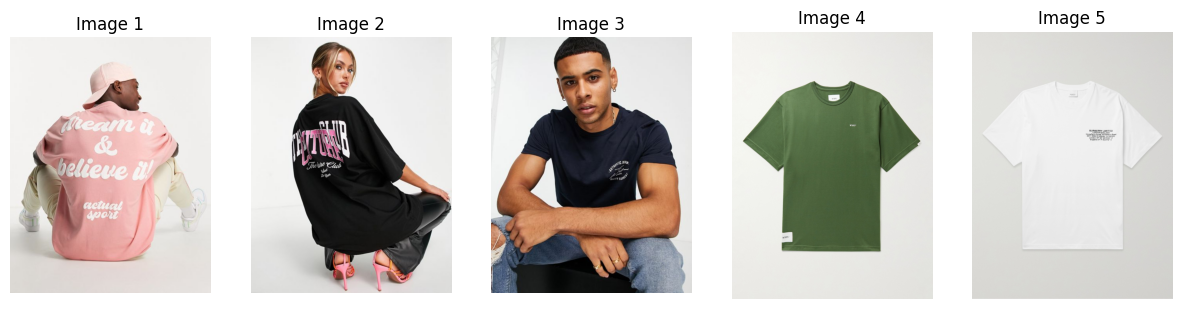

In [6]:
import matplotlib.pyplot as plt
from PIL import Image


images = []
for img_file in image_files:
    image_path = os.path.join(image_folder, img_file)
    img = Image.open(image_path)
    images.append(img)

fig, axes = plt.subplots(1, min(5, len(images)), figsize=(15, 5))

for i in range(min(5, len(images))):
    axes[i].imshow(images[i])
    axes[i].axis('off')
    axes[i].set_title(f"Image {i+1}")

plt.show()


# Image Retrieval

In [12]:
!pip install transformers torch torchvision faiss-cpu numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 865.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 58.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [1]:
def retrieve_similar_images_batch(query, image_paths, batch_size=10, top_k=5):

    text_inputs = processor(text=[query], return_tensors="pt", padding=True)
    with torch.no_grad():
        text_embeddings = model.get_text_features(**text_inputs)
    text_embeddings = text_embeddings / text_embeddings.norm(p=2, dim=-1, keepdim=True)

    all_similar_images = []
    all_similar_image_paths = []

    for i in range(0, len(image_paths), batch_size):
        batch_paths = image_paths[i:i + batch_size]
        images = [Image.open(image_path) for image_path in batch_paths]

        inputs = processor(images=images, return_tensors="pt", padding=True)
        with torch.no_grad():
            image_embeddings = model.get_image_features(**inputs)
        image_embeddings = image_embeddings / image_embeddings.norm(p=2, dim=-1, keepdim=True)
        similarities = torch.matmul(text_embeddings, image_embeddings.T)

        top_k_indices = similarities.argsort(descending=True)[0][:top_k]

        similar_images_batch = [images[idx] for idx in top_k_indices]
        similar_image_paths_batch = [batch_paths[idx] for idx in top_k_indices]

        all_similar_images.extend(similar_images_batch)
        all_similar_image_paths.extend(similar_image_paths_batch)

    fig, axes = plt.subplots(1, top_k, figsize=(15, 5))
    for i in range(top_k):
        axes[i].imshow(all_similar_images[i])
        axes[i].axis('off')
        axes[i].set_title(f"Image {i+1}\n{all_similar_image_paths[i].split('/')[-1]}")
    plt.show()

    return all_similar_image_paths, all_similar_images


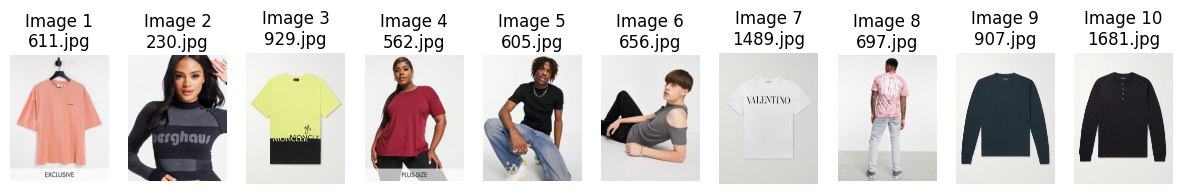

In [11]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from transformers import CLIPProcessor, CLIPModel
import torch


zip_file_path = '/content/drive/MyDrive/Datasets/Tshirt.zip'
extract_dir = '/content/drive/MyDrive/Datasets/Tshirt'
image_folder = os.path.join(extract_dir, 'tshirt')
image_files = os.listdir(image_folder)

processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
model.to('cpu')


query = "orange T-shirt"

image_paths = random.sample([os.path.join(image_folder, img_file) for img_file in image_files], 200)

similar_image_paths, similar_images = retrieve_similar_images_batch(query, image_paths, top_k=10)

# Image Captioning

In [7]:
import random

image_paths = random.sample([os.path.join(image_folder, img_file) for img_file in image_files], 200)

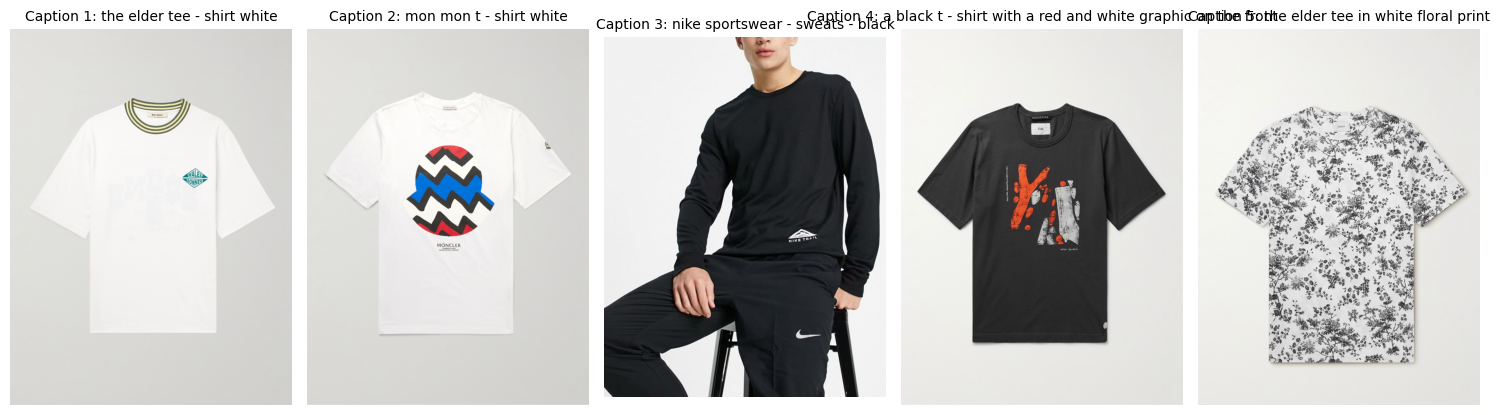

In [17]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import os
import random
import torch
import matplotlib.pyplot as plt

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

def generate_caption(image_path):
    raw_image = Image.open(image_path).convert("RGB")

    inputs = processor(raw_image, return_tensors="pt")

    out = model.generate(**inputs)

    caption = processor.decode(out[0], skip_special_tokens=True)
    return caption

def generate_captions_for_images(image_paths):
    captions = []
    for image_path in image_paths:
        caption = generate_caption(image_path)
        captions.append(caption)
    return captions

def display_images_with_captions(image_paths, captions, top_k=5):
    fig, axes = plt.subplots(1, top_k, figsize=(15, 5))

    for i in range(top_k):
        img = Image.open(image_paths[i])
        axes[i].imshow(img)
        axes[i].axis('off')

        axes[i].set_title(f"Caption {i+1}: {captions[i]}", fontsize=10, wrap=True)

    plt.tight_layout()
    plt.show()

image_folder = '/content/drive/MyDrive/Datasets/Tshirt/tshirt'
image_files = os.listdir(image_folder)

image_paths = random.sample([os.path.join(image_folder, img_file) for img_file in image_files], 200)

captions = generate_captions_for_images(image_paths)

display_images_with_captions(image_paths, captions, top_k=5)


# Text Retrieval

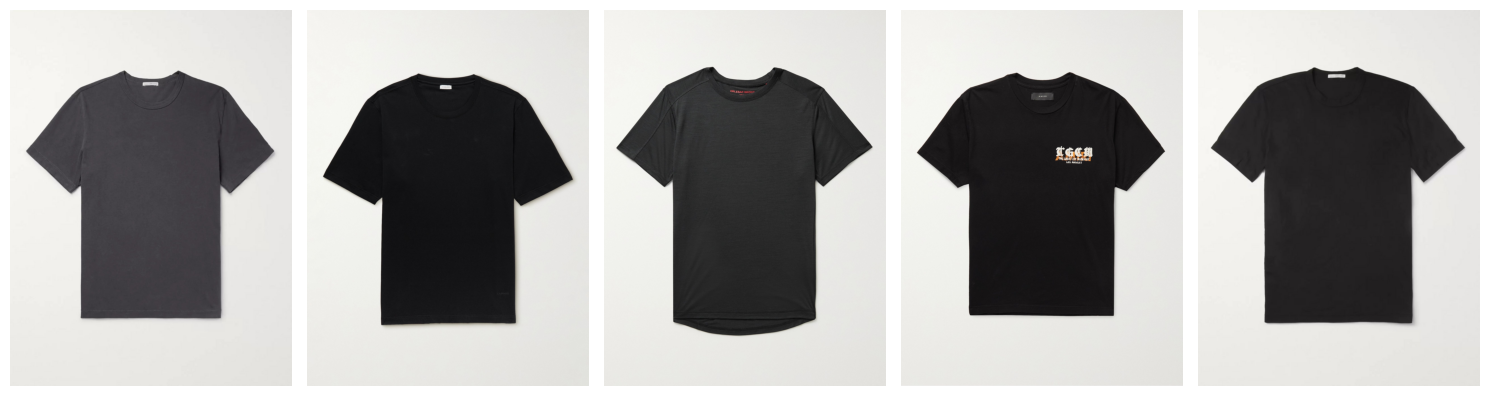

In [16]:
import os
import torch
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt
from transformers import CLIPProcessor, CLIPModel, BlipProcessor, BlipForConditionalGeneration
from sklearn.metrics.pairwise import cosine_similarity

processor_clip = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

processor_blip = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model_blip = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

def generate_caption(image_path):

    raw_image = Image.open(image_path).convert("RGB")

    inputs = processor_blip(raw_image, return_tensors="pt")

    out = model_blip.generate(**inputs)

    caption = processor_blip.decode(out[0], skip_special_tokens=True)
    return caption


def generate_captions_for_images(image_paths):

    captions = []
    for image_path in image_paths:
        caption = generate_caption(image_path)
        captions.append(caption)
    return captions

def display_images_with_captions(image_paths, captions, top_k=5):

    fig, axes = plt.subplots(1, top_k, figsize=(15, 5))

    for i in range(top_k):
        img = Image.open(image_paths[i])
        axes[i].imshow(img)
        axes[i].axis('off')

        axes[i].set_xlabel(captions[i], fontsize=10, wrap=True)

    plt.tight_layout()
    plt.show()


def retrieve_images_by_text(query, image_paths, captions, top_k=5):

    inputs = processor_clip(text=query, return_tensors="pt", padding=True)
    query_embeddings = clip_model.get_text_features(**inputs)
    query_embeddings = query_embeddings.squeeze(0).detach().numpy()

    caption_embeddings = []
    for caption in captions:
        inputs = processor_clip(text=caption, return_tensors="pt", padding=True)
        caption_embedding = clip_model.get_text_features(**inputs)
        caption_embeddings.append(caption_embedding.squeeze(0).detach().numpy())


    query_embeddings = query_embeddings.reshape(1, -1)
    caption_embeddings = np.array(caption_embeddings)

    similarities = cosine_similarity(query_embeddings, caption_embeddings)

    ranked_indices = np.argsort(similarities[0])[::-1]
    top_image_paths = [image_paths[i] for i in ranked_indices[:top_k]]
    top_captions = [captions[i] for i in ranked_indices[:top_k]]

    return top_image_paths, top_captions


def display_retrieved_images(query, image_paths, captions, top_k=5):

    top_image_paths, top_captions = retrieve_images_by_text(query, image_paths, captions, top_k)

    fig, axes = plt.subplots(1, top_k, figsize=(15, 5))
    for i in range(top_k):
        img = Image.open(top_image_paths[i])
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_xlabel(top_captions[i], fontsize=10, wrap=True)

    plt.tight_layout()
    plt.show()

zip_file_path = '/content/drive/MyDrive/Datasets/Tshirt.zip'
extract_dir = '/content/drive/MyDrive/Datasets/Tshirt'
image_folder = os.path.join(extract_dir, 'tshirt')
image_files = os.listdir(image_folder)

image_paths = [os.path.join(image_folder, img_file) for img_file in image_files[:200]]

captions = generate_captions_for_images(image_paths)

query = "black T-shirt"

display_retrieved_images(query, image_paths, captions, top_k=5)
